# ***Instalamos los modulos correspondientes***

In [ ]:
!pip install deap
!pip install pyswarm
!pip install pyswarms
!pip install pyswarms
!pip install genetic_algorithm
!sudo apt-get install imagemagick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Visualizamos la Funcion Schwefel en 3D** Con 2 variables de entrada



<ipython-input-12-7a49bc8a71b8>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m)


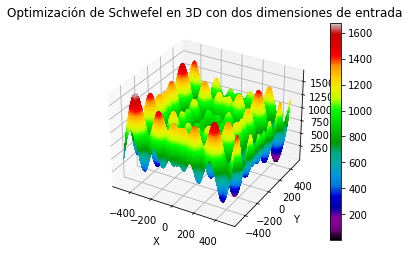

In [ ]:
from matplotlib import cm
import math
import matplotlib.pyplot as plt
import numpy as np


def schwefel(*X):
    n = len(X)
    return 418.9829 * n - sum([x * np.sin(np.sqrt(abs(x))) for x in X])

if __name__ == '__main__':
    X = np.linspace(-500, 500, 250)
    Y = np.linspace(-500, 500, 250)

    X, Y = np.meshgrid(X, Y)

    Z = schwefel(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral, linewidth=0, antialiased=False)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.title('Optimización de Schwefel en 3D con dos dimensiones de entrada')
    m = cm.ScalarMappable(cmap=cm.nipy_spectral)
    m.set_array(Z)
    plt.colorbar(m)
    plt.savefig('schwefel_2D.png')

**Usamos el metodo de descenso por gradiente para optimizar nuestra funcion Schwefel** 2D

------------------------
iteración  1
x =  -422.01609617754923 , y =  175.48050428707145 z =  1096.4426480039892
------------------------
iteración  2
x =  -430.8035269510004 , y =  167.26754768109882 z =  1096.4426480039892
------------------------
iteración  3
x =  -439.5751628017123 , y =  158.9806603813401 z =  1096.4426480039892
------------------------
iteración  4
x =  -448.3132422948389 , y =  150.61168704444987 z =  1096.4426480039892
------------------------
iteración  5
x =  -457.0018635052777 , y =  142.16090824287278 z =  1096.4426480039892
------------------------
iteración  6
x =  -465.6276935127937 , y =  133.63822147679699 z =  1096.4426480039892
------------------------
iteración  7
El nuevo valor de x es:  -474.1804626644415
El nuevo valor de y es:  125.06324488269942
El nuevo valor de z es:  1096.4426480039892
x =  -474.1804626644415 , y =  125.06324488269942 z =  1062.2147877937823
------------------------
iteración  8
El nuevo valor de x es:  -482.6532335746841
El

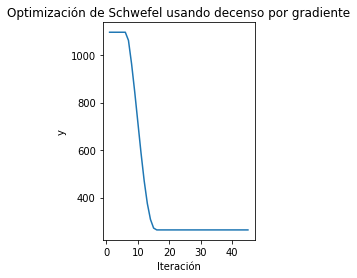

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import uniform
from numpy import linspace
import numpy as np
import math


def schwefel(*X):
    n = len(X)
    return 418.9829 * n - sum([x * np.sin(np.sqrt(abs(x))) for x in X])

x_inicial = uniform(-500, 500)
y_inicial = uniform(-500, 500)
alpha = 0.01
n_iteraciones = 45

iteraciones = []
w = []


x = x_inicial
y = y_inicial
z = schwefel(x, y)
optimo = z

for i in range(n_iteraciones):
    print('------------------------')
    print('iteración ', str(i+1))
	
    # Calcular gradiente
    x = x - alpha * (418.9829 * 2 - 2 * np.sin(np.sqrt(abs(x))) * np.sqrt(abs(x)) * np.sign(x))
    y = y - alpha * (418.9829 * 2 - 2 * np.sin(np.sqrt(abs(y))) * np.sqrt(abs(y)) * np.sign(y))
    newz = schwefel(x,y)
	
    if z > newz:
        xOpt=x
        yOpt=y
        zOpt=newz
        print('El nuevo valor de x es: ', x)
        print('El nuevo valor de y es: ', y)
        print('El nuevo valor de z es: ', z)
        z = newz
	
    # Almacenar iteración y valor correspondiente
    w.append(z)
    iteraciones.append(i+1)

    # Imprimir resultados
    print('x = ', str(x), ', y = ', str(y) ,'z = ', str(z))

plt.subplot(1,2,1)
plt.plot(iteraciones,w)
plt.xlabel('Iteración')
plt.ylabel('y')
plt.title('Optimización de Schwefel usando decenso por gradiente')

print('Los valores optimos encontrados son:\nx: ', str(xOpt),'\ny: ', str(yOpt),'\nz: ', str(zOpt))

<ipython-input-36-a9c038c4e94a>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  img = ax.scatter(xOpt, yOpt, zOpt, cmap='jet')


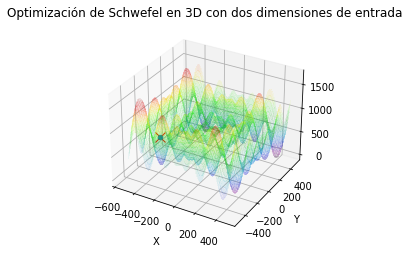

In [ ]:
X = np.linspace(-500, 500, 100)
Y = np.linspace(-500, 500, 100)

X, Y = np.meshgrid(X, Y)

Z = schwefel(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral, linewidth=0, antialiased=False, alpha=0.05)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Optimización de Schwefel en 3D con dos dimensiones de entrada')

m = cm.ScalarMappable(cmap=cm.nipy_spectral)
m.set_array(Z)

ax.plot(xOpt, yOpt, zOpt, 'rx', markersize=10)
img = ax.scatter(xOpt, yOpt, zOpt, cmap='jet')

------------------------
iteración  1
El nuevo valor de x es:  [ 406.21540184 -110.26320131   96.07736323]
El nuevo valor de fx es:  803.3232244726726
x =  [ 406.21540184 -110.26320131   96.07736323] , fx =  803.3232244726726
------------------------
iteración  2
El nuevo valor de x es:  [ 406.57638194 -110.60058314   95.58488378]
El nuevo valor de fx es:  798.4800131683177
x =  [ 406.57638194 -110.60058314   95.58488378] , fx =  798.4800131683177
------------------------
iteración  3
El nuevo valor de x es:  [ 406.92899008 -110.93163744   95.09153979]
El nuevo valor de fx es:  793.7302575816288
x =  [ 406.92899008 -110.93163744   95.09153979] , fx =  793.7302575816288
------------------------
iteración  4
El nuevo valor de x es:  [ 407.27338925 -111.25638732   94.59766363]
El nuevo valor de fx es:  789.0737760683502
x =  [ 407.27338925 -111.25638732   94.59766363] , fx =  789.0737760683502
------------------------
iteración  5
El nuevo valor de x es:  [ 407.60974146 -111.57486265   94

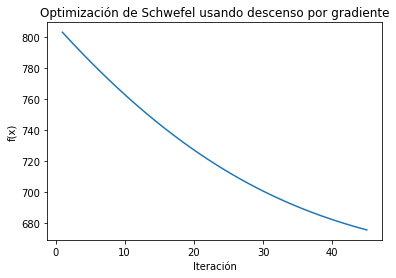

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.random import uniform

def schwefel(x):
    d = len(x)
    return 418.9829*d - np.sum(x*np.sin(np.sqrt(np.abs(x))))

x_inicial = uniform(-500, 500, size=3)
alpha = 0.1
n_iteraciones = 45

iteraciones = []
w = []

x = x_inicial
fx = schwefel(x)
optimo = fx

for i in range(n_iteraciones):
    print('------------------------')
    print('iteración ', str(i+1))

    # Calcular gradiente
    grad = []
    for j in range(len(x)):
        x_perturbado = np.copy(x)
        x_perturbado[j] += 0.0001
        grad_i = (schwefel(x_perturbado) - fx)/0.0001
        grad.append(grad_i)

    x = x - alpha*np.array(grad)
    newfx = schwefel(x)

    if fx > newfx:
        xOp = x
        fxOp = newfx
        fx = newfx
        print('El nuevo valor de x es: ', x)
        print('El nuevo valor de fx es: ', fx)

    # Almacenar iteración y valor correspondiente
    w.append(fx)
    iteraciones.append(i+1)

    # Imprimir resultados
    print('x = ', str(x), ', fx = ', str(fx))

plt.plot(iteraciones, w)
plt.xlabel('Iteración')
plt.ylabel('f(x)')
plt.title('Optimización de Schwefel usando descenso por gradiente')

print('El valor óptimo encontrado es: \nx: ', str(xOp), '\nfx: ', str(fxOp))

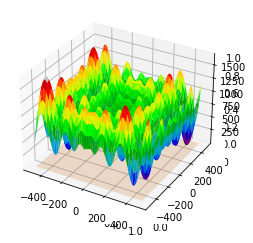

In [ ]:
from matplotlib import cm
import math
import matplotlib.pyplot as plt
import numpy as np

def schwefel(x):
    d = len(x)
    return 418.9829*d - np.sum(x*np.sin(np.sqrt(np.abs(x))))

if __name__ == '__main__':
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-500, 500, 100)
y = np.linspace(-500, 500, 100)
z1 = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        z1[i, j] = schwefel([x[i], y[j]])

X, Y = np.meshgrid(x, y)
Z2 = np.ones((100, 100)) * fxOp


ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, z1, cmap=cm.nipy_spectral)
ax.plot_surface(X, Y, Z2, alpha=0.2)
plt.show()

**Decenso gradiente en 3D**

------------------------
iteración  1
x =  340.68135270899455 , y =  492.6923872631532 , z =  -330.63276301848555 , fx =  1282.946965382638
------------------------
iteración  2
x =  339.9454238884146 , y =  491.7018645282428 , z =  -331.4571089861944 , fx =  1282.946965382638
------------------------
iteración  3
x =  339.2070796468207 , y =  490.71051189880313 , z =  -332.2853440987329 , fx =  1282.946965382638
------------------------
iteración  4
x =  338.46637405604895 , y =  489.71851449305564 , z =  -333.1173963155414 , fx =  1282.946965382638
------------------------
iteración  5
x =  337.7233628290866 , y =  488.7260581085339 , z =  -333.9531898692049 , fx =  1282.946965382638
------------------------
iteración  6
x =  336.97810327056726 , y =  487.7333289895293 , z =  -334.7926452695691 , fx =  1282.946965382638
------------------------
iteración  7
x =  336.23065422465004 , y =  486.74051359276797 , z =  -335.6356793149411 , fx =  1282.946965382638
------------------------
i

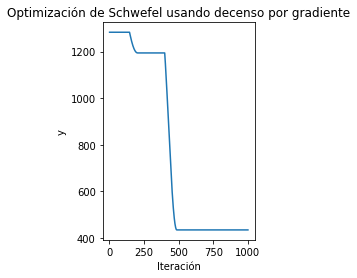

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import uniform
import numpy as np
import math

def schwefel(*X):
    d = len(X)
    return 418.9829 * d - sum([x * np.sin(np.sqrt(abs(x))) for x in X])

x_inicial = uniform(-500, 500)
y_inicial = uniform(-500, 500)
z_inicial = uniform(-500, 500)
alpha = 0.0005
n_iteraciones = 1000

iteraciones = []
w = []

x = x_inicial
y = y_inicial
z = z_inicial
fx = schwefel(x,y,z)
optimo=fx

for i in range(n_iteraciones):
    print('------------------------')
    print('iteración ', str(i+1))

    # Calcular gradiente
    grad_x = 418.9829 * 3 - np.sum([np.sin(np.sqrt(abs(x))) + x * np.cos(np.sqrt(abs(x))) * np.sqrt(abs(x)) / (2 * np.sqrt(abs(x))) for x in [x, y, z]])
    grad_y = 418.9829 * 3 - np.sum([np.sin(np.sqrt(abs(y))) + y * np.cos(np.sqrt(abs(y))) * np.sqrt(abs(y)) / (2 * np.sqrt(abs(y))) for x in [x, y, z]])
    grad_z = 418.9829 * 3 - np.sum([np.sin(np.sqrt(abs(z))) + z * np.cos(np.sqrt(abs(z))) * np.sqrt(abs(z)) / (2 * np.sqrt(abs(z))) for x in [x, y, z]])

    # Actualizar "x, y, z" usando gradiente descendente
    x = x - alpha * grad_x
    y = y - alpha * grad_y
    z = z - alpha * grad_z

    newfx = schwefel(x, y, z)

    if fx > newfx:
        xOp = x
        yOp = y
        zOp = z
        fxOp = newfx
        print('El nuevo valor de x es: ', x)
        print('El nuevo valor de y es: ', y)
        print('El nuevo valor de z es: ', z)
        print('El nuevo valor de fx es: ', fx)
        fx = newfx

    # Almacenar iteración y valor correspondiente
    w.append(fx)
    iteraciones.append(i+1)

    # Imprimir resultados
    print('x = ', str(x), ', y = ', str(y) ,', z = ', str(z), ', fx = ', str(fx))

plt.subplot(1,2,1)
plt.plot(iteraciones,w)
plt.xlabel('Iteración')
plt.ylabel('y')

plt.title('Optimización de Schwefel usando decenso por gradiente')

print('Los valores optimos encontrados son:\nx: ', str(xOp),'\ny: ', str(yOp),'\nz: ', str(zOp),'\nfx: ', str(fxOp))

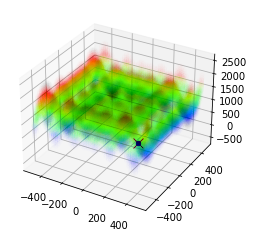

In [ ]:
def schwefel(*X):
    d = len(X)
    return 418.9829 * d - sum([x * np.sin(np.sqrt(abs(x))) for x in X])

if __name__ == '__main__':
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = np.linspace(-500, 500, 50)
    y = np.linspace(-500, 500, 50)
    z = np.linspace(-500, 500, 50)

    X, Y, Z = np.meshgrid(x, y, z)

    Z1 = schwefel(X, Y, Z)

    img = ax.scatter(X, Y, Z1, c=Z1, cmap='jet', alpha=0.004)

    ax.plot(xOp, yOp, zOp, 'rx', markersize=10)
    ax.scatter(xOp, yOp, zOp, c=fxOp, cmap='jet')

    plt.show()


**Evolucion diferencial en 2D**

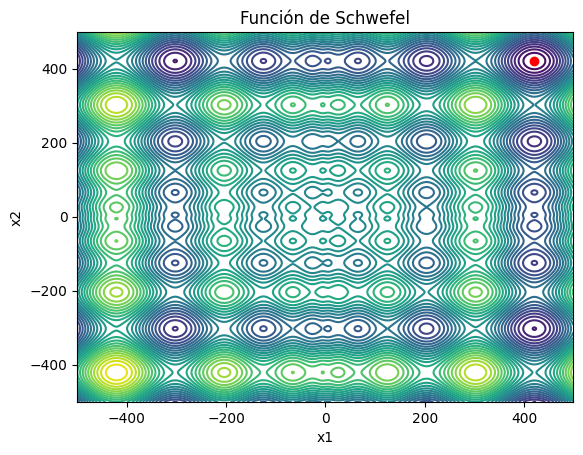

In [3]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

def f_schwefel2d_vec(x):
    x1 = x[0]
    x2 = x[1]
    y = 418.9829*2 - (x1*np.sin(np.sqrt(np.abs(x1))) + x2*np.sin(np.sqrt(np.abs(x2))))
    return y

bounds = [(-500, 500), (-500, 500)]
opt_schwefel = differential_evolution(f_schwefel2d_vec, bounds)

# Plotting the function and the optimum
delta = 1
x1, x2 = np.meshgrid(np.arange(-500, 500, delta), np.arange(-500, 500, delta))
Z = f_schwefel2d_vec([x1, x2])

plt.figure()
plt.contour(x1, x2, Z, levels=30)
plt.plot(opt_schwefel.x[0], opt_schwefel.x[1], 'ro')
plt.title('Función de Schwefel')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**Evolucion diferencial en 3D**

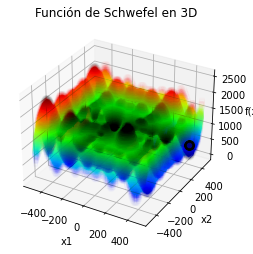

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f_schwefel3d_vec(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    y = 418.9829*3 - (x1*np.sin(np.sqrt(np.abs(x1))) + x2*np.sin(np.sqrt(np.abs(x2))) + x3*np.sin(np.sqrt(np.abs(x3))))
    return y

bounds = [(-500, 500), (-500, 500), (-500, 500)]
opt_schwefel = differential_evolution(f_schwefel3d_vec, bounds)

# Plotting the function and the optimum
delta = 10
x1, x2, x3 = np.meshgrid(np.arange(-500, 500, delta), np.arange(-500, 500, delta), np.arange(-500, 500, delta))
Z = f_schwefel3d_vec([x1, x2, x3])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(opt_schwefel.x[0], opt_schwefel.x[1], opt_schwefel.x[2], 'ro', markersize=10)
ax.scatter(opt_schwefel.x[0], opt_schwefel.x[1], opt_schwefel.x[2], c=opt_schwefel.x[2], cmap='jet')
img = ax.scatter(np.ravel(x1), np.ravel(x2), np.ravel(Z), c=np.ravel(Z), cmap='jet', marker=',', alpha=0.002)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Función de Schwefel en 3D')
plt.show()

**Optimizacion de Particulas en 2D**

In [ ]:
import pyswarm
import numpy as np

def f_schwefel2d_vec(x):
    x1 = x[0]
    x2 = x[1]
    y = 418.9829 * 2 - (x1 * np.sin(np.sqrt(np.abs(x1))) + x2 * np.sin(np.sqrt(np.abs(x2))))
    return y

lb = [-500, -500]
ub = [500, 500]

xopt, fopt = pyswarm.pso(f_schwefel2d_vec, lb, ub, debug=True)

print('The minimum value is: ', str(fopt), '\nwith coordinates x: ', str(xopt[0]), '\nand y: ', str(xopt[1]))

No constraints given.
New best for swarm at iteration 1: [425.60326587 417.47958005] 4.245395330291103
Best after iteration 1: [425.60326587 417.47958005] 4.245395330291103
Best after iteration 2: [425.60326587 417.47958005] 4.245395330291103
Best after iteration 3: [425.60326587 417.47958005] 4.245395330291103
Best after iteration 4: [425.60326587 417.47958005] 4.245395330291103
Best after iteration 5: [425.60326587 417.47958005] 4.245395330291103
Best after iteration 6: [425.60326587 417.47958005] 4.245395330291103
Best after iteration 7: [425.60326587 417.47958005] 4.245395330291103
New best for swarm at iteration 8: [419.43232677 426.38536076] 4.002140379596085
New best for swarm at iteration 8: [419.55304659 420.5574931 ] 0.2740977178132198
Best after iteration 8: [419.55304659 420.5574931 ] 0.2740977178132198
New best for swarm at iteration 9: [421.20507136 422.25342916] 0.21541358301806213
Best after iteration 9: [421.20507136 422.25342916] 0.21541358301806213
New best for swarm

**Optimizacion de particulas en 3D**

In [ ]:
import numpy as np
from pyswarm import pso

# Definimos la función de Schwefel
def schwefel(x):
    return -np.sum(x * np.sin(np.sqrt(np.abs(x))))

# Definimos los límites de los parámetros
lb = [-500, -500, -500]
ub = [500, 500, 500]

# Usamos la optimización por enjambre de partículas para minimizar la función de Schwefel
xopt, fopt = pso(schwefel, lb, ub)

# Imprimimos los resultados
print("Los parámetros óptimos son:", xopt)
print("El valor mínimo de la función de Schwefel es:", -fopt)

Stopping search: Swarm best objective change less than 1e-08
Los parámetros óptimos son: [ 420.96881519 -302.52468853  420.96840805]
El valor mínimo de la función de Schwefel es: 1138.510327180092


# **Representacion de un gif animado del proceso de optimizacion de descenso por gradiente y el proceso usando el método heurístico.**

(Estos codigos generar y guardan 2 archivos optimizacion.gif y schwefel_optimization.gif, que son respectivamente optimizacion por descenso del gradiente y el metodo heuristico respectivamente)

MovieWriter imagemagick unavailable; using Pillow instead.


El nuevo valor de x es: 288.75, el nuevo valor de y es: -444.72, el nuevo valor de z es: 1464.08
El nuevo valor de x es: 280.04, el nuevo valor de y es: -453.43, el nuevo valor de z es: 1368.67
El nuevo valor de x es: 271.38, el nuevo valor de y es: -462.09, el nuevo valor de z es: 1245.50
El nuevo valor de x es: 262.77, el nuevo valor de y es: -470.67, el nuevo valor de z es: 1101.84
El nuevo valor de x es: 254.23, el nuevo valor de y es: -479.18, el nuevo valor de z es: 945.93
El nuevo valor de x es: 245.78, el nuevo valor de y es: -487.60, el nuevo valor de z es: 786.36
El nuevo valor de x es: 237.41, el nuevo valor de y es: -495.94, el nuevo valor de z es: 631.46
El nuevo valor de x es: 229.12, el nuevo valor de y es: -504.20, el nuevo valor de z es: 488.81
El nuevo valor de x es: 220.90, el nuevo valor de y es: -512.38, el nuevo valor de z es: 364.85
El nuevo valor de x es: 212.75, el nuevo valor de y es: -520.48, el nuevo valor de z es: 264.67
El nuevo valor de x es: 204.63, el n

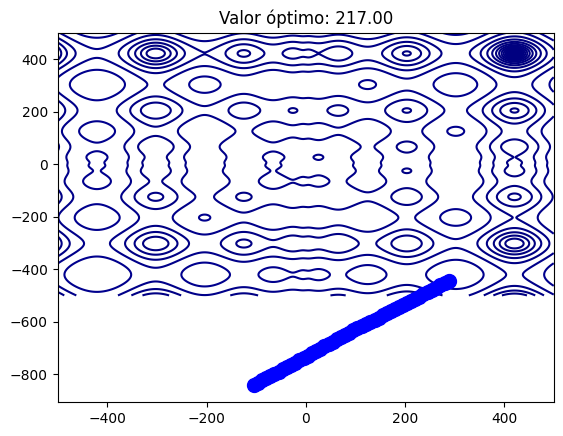

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# Función de Schwefel
def schwefel(*X):
    n = len(X)
    return 418.9829 * n - sum([x * np.sin(np.sqrt(abs(x))) for x in X])

# Parámetros del algoritmo
x_inicial = np.random.uniform(-500, 500)
y_inicial = np.random.uniform(-500, 500)
alpha = 0.01
n_iteraciones = 1000

# Variables de seguimiento
x = x_inicial
y = y_inicial
z = schwefel(x, y)
optimo = z

# Crear la figura y los ejes
fig = plt.figure()
ax = fig.add_subplot(111)

# Crear la gráfica de la función de Schwefel
x_vals = np.linspace(-500, 500, 1000)
y_vals = np.linspace(-500, 500, 1000)
X, Y = np.meshgrid(x_vals, y_vals)
Z = schwefel(X, Y)
ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')

# Inicializar la línea que muestra la trayectoria de la optimización
line, = ax.plot([], [], 'r-', animated=True)

# Función de animación
def animate(i):
    global x, y, z, optimo
    
    # Calcular gradiente
    x = x - alpha * (418.9829 * 2 - 2 * np.sin(np.sqrt(abs(x))) * np.sqrt(abs(x)) * np.sign(x))
    y = y - alpha * (418.9829 * 2 - 2 * np.sin(np.sqrt(abs(y))) * np.sqrt(abs(y)) * np.sign(y))
    newz = schwefel(x,y)

    # Actualizar el valor óptimo y la trayectoria de la optimización
    if z > newz:
        x_optimo = x
        y_optimo = y
        z_optimo = newz
        optimo = z_optimo
        line.set_data(np.append(line.get_xdata(), x), np.append(line.get_ydata(), y))
        print(f"El nuevo valor de x es: {x:.2f}, el nuevo valor de y es: {y:.2f}, el nuevo valor de z es: {newz:.2f}")

    # Actualizar el valor de z
    z = newz

    # Actualizar la posición de la partícula
    ax.plot(x, y, 'bo', markersize=10)

    # Actualizar la etiqueta del valor óptimo
    ax.set_title(f"Valor óptimo: {optimo:.2f}")

    return line,

# Crear la animación
ani = animation.FuncAnimation(fig, animate, frames=45, blit=True)

# Guardar la animación en un archivo GIF
ani.save('optimizacion.gif', writer='imagemagick', fps=5)

C:\Users\jandr\AppData\Local\Temp\ipykernel_4980\857163762.py:34: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_xdata(optimal_points[i][0])
C:\Users\jandr\AppData\Local\Temp\ipykernel_4980\857163762.py:35: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_ydata(optimal_points[i][1])
C:\Users\jandr\AppData\Local\Temp\ipykernel_4980\857163762.py:34: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_xdata(optimal_points[i][0])
C:\Users\jandr\AppData\Local\Temp\ipykernel_4980\857163762.py:35: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_ydata(optimal_points[i][1])


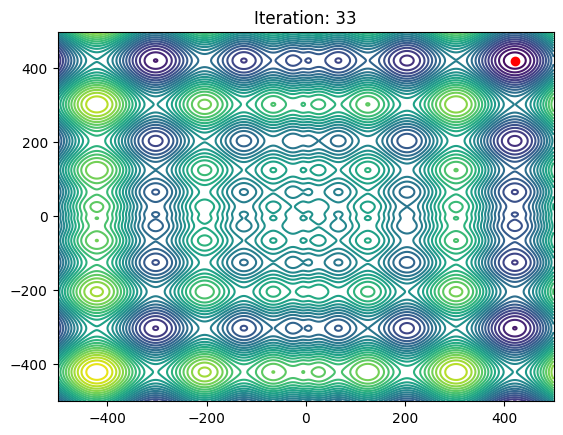

In [4]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f_schwefel2d_vec(x):
    x1 = x[0]
    x2 = x[1]
    y = 418.9829*2 - (x1*np.sin(np.sqrt(np.abs(x1))) + x2*np.sin(np.sqrt(np.abs(x2))))
    return y

bounds = [(-500, 500), (-500, 500)]
maxiter = 50

optimal_points = []
def callback(xk, convergence):
    optimal_points.append(xk)

# Correr la optimización
res = differential_evolution(f_schwefel2d_vec, bounds, maxiter=maxiter, disp=False, callback=callback)

# Crear la animación
fig, ax = plt.subplots()
delta = 1
x1, x2 = np.meshgrid(np.arange(-500, 500, delta), np.arange(-500, 500, delta))
Z = f_schwefel2d_vec([x1, x2])

contour = ax.contour(x1, x2, Z, levels=30)
point, = ax.plot(opt_schwefel.x[0], opt_schwefel.x[1], 'ro')

def update(i):
    ax.set_title('Iteration: ' + str(i+1))
    if i < len(optimal_points):
        point.set_xdata(optimal_points[i][0])
        point.set_ydata(optimal_points[i][1])
    return point, 

ani = animation.FuncAnimation(fig, update, frames=len(optimal_points), interval=1000, blit=True)
ani.save('schwefel_optimization.gif', writer='pillow')
plt.show()